In [1]:
from matplotlib import pyplot as plt
import numpy as np
import h5py
import keras
from sklearn.model_selection import train_test_split
import os

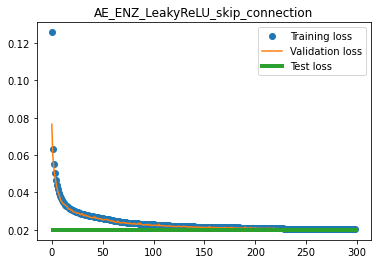

In [2]:
# %% Need to specify model_name first
model_name = 'AE_ENZ_LeakyReLU_skip_connection'
model_dir = './Model_and_datasets_1D' + f'/{model_name}'
data_dir = './training_datasets'

# %% load dataset
with h5py.File(data_dir + '/training_datasets_waveform.hdf5', 'r') as f:
    time = f['time'][:]
    X_train = f['X_train'][:]
    Y_train = f['Y_train'][:]

# %% load model
model = keras.models.load_model(model_dir + '/' + f'{model_name}_Model.hdf5')

# split the model based on the information provided by the model
# split the model based on the information provided by the model
with h5py.File(model_dir + '/' + f'/{model_name}_Dataset_split.hdf5', 'r') as f:
    train_size = f.attrs['train_size']
    rand_seed1 = f.attrs['rand_seed1']
    rand_seed2 = f.attrs['rand_seed2']

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, train_size=0.6, random_state=rand_seed1)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=rand_seed2)

# %% model evaluation
test_eval = model.evaluate(X_test, Y_test, verbose=0)

# Output some figures
figure_dir = model_dir + '/Figures'
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)

# %% Show loss evolution
with h5py.File(model_dir + '/' + f'{model_name}_Training_history.hdf5', 'r') as f:
    loss = f['loss'][:]
    val_loss = f['val_loss'][:]
plt.figure()
plt.plot(loss, 'o', label='Training loss')
plt.plot(val_loss, '-', label='Validation loss')
plt.plot([1, len(loss)], [test_eval, test_eval], '-', label='Test loss', linewidth=4)
plt.legend()
plt.title(model_name)
#plt.show()
plt.savefig(figure_dir + f"/{model_name}_Loss_evolution.png")



In [3]:
# %% predict the waveforms
Y_predict = model.predict(X_test)

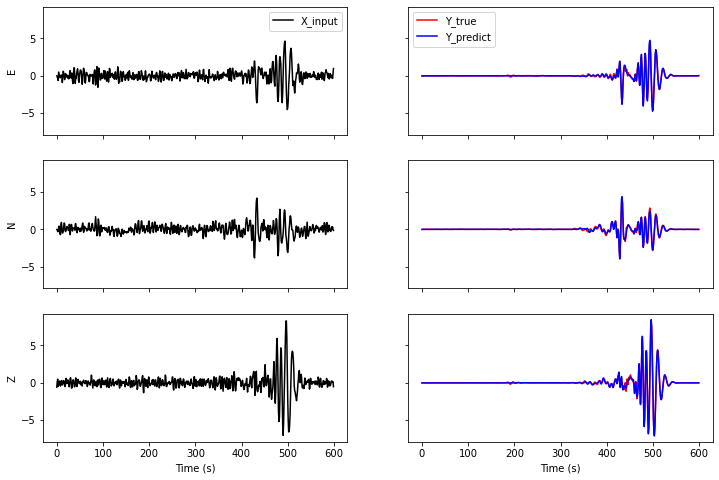

In [7]:
# %% Check the waveforms
plt.close("all")
i_model = np.random.randint(0, X_test.shape[0])
fig, ax = plt.subplots(X_test.shape[2], 2, sharex=True, sharey=True, num=1, figsize=(12, 8))

vmax = None
vmin = None
for i in range(X_test.shape[2]):
    ax[i, 0].plot(time, X_test[i_model, :, i], '-k', label='X_input')
    ax[i, 1].plot(time, Y_test[i_model, :, i], '-r', label='Y_true')
    ax[i, 1].plot(time, Y_predict[i_model, :, i], '-b', label='Y_predict')

titles = ['E', 'N', 'Z']
for i in range(X_test.shape[2]):
    ax[i, 0].set_ylabel(titles[i])

ax[0, 0].legend()
ax[0, 1].legend()
ax[-1, 0].set_xlabel('Time (s)')
ax[-1, 1].set_xlabel('Time (s)')
#plt.show()

plt.figure(1)
plt.savefig(figure_dir + f'/{model_name}_Prediction_waveform_model_{i_model}.png')